# Mutag

In [3]:
0.5*np.array([[1,2],[2,3]])

array([[ 0.5,  1. ],
       [ 1. ,  1.5]])

In [1]:
import numpy as np
import os,sys
module_path = os.path.abspath(os.path.join('/Users/vayer/Documents/OT/Python/GW_tests/'))
if module_path not in sys.path:
    sys.path.append(module_path)
from graph import *
import copy
import NN,time
from sklearn.model_selection import StratifiedKFold
import ot_distances
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from ot_distances import Wasserstein_distance as EMD
from ot_distances import Gromov_Wasserstein_distance as WGW

In [2]:
path='./data/MUTAG_2/'

In [3]:
dataset=build_MUTAG_dataset(path)

In [4]:
X,y=zip(*dataset)

In [30]:
d={'epsilon': 100.0, 'normalize_distance': True, 'method': 'shortest_path'}

In [16]:
gw=WGW(alpha=0.5,epsilon=100,method='shortest_path')

Classe :  1


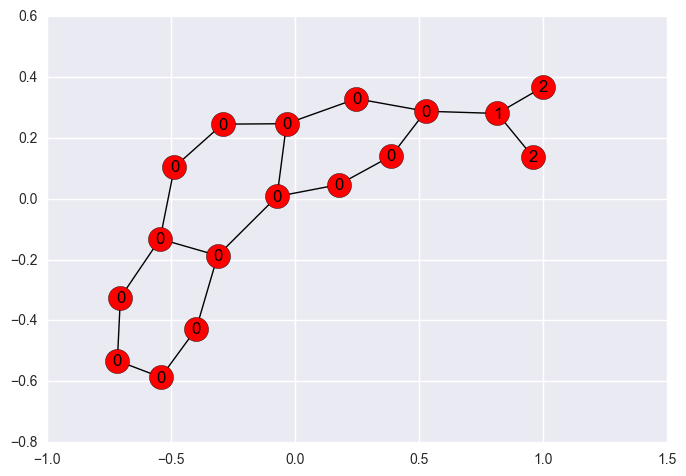

In [12]:
print('Classe : ',y[0])
X[0].display_graph(labels= nx.get_node_attributes(X[0].nx_graph, 'attr_name'))

Classe :  -1


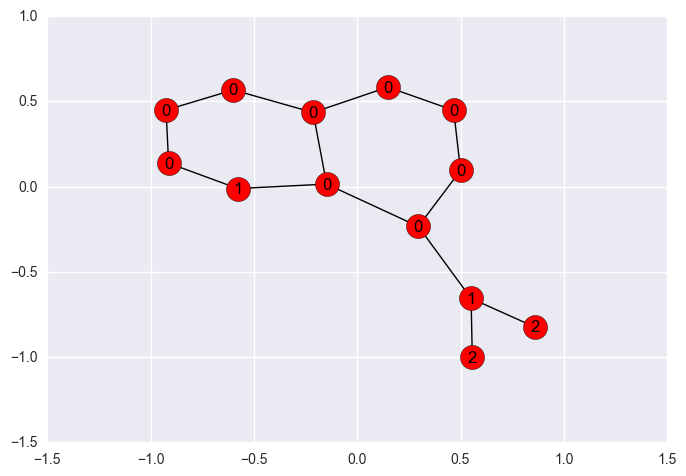

In [13]:
print('Classe : ',y[1])
X[1].display_graph(labels= nx.get_node_attributes(X[1].nx_graph, 'attr_name'))

### Influence de epsilon sur la map

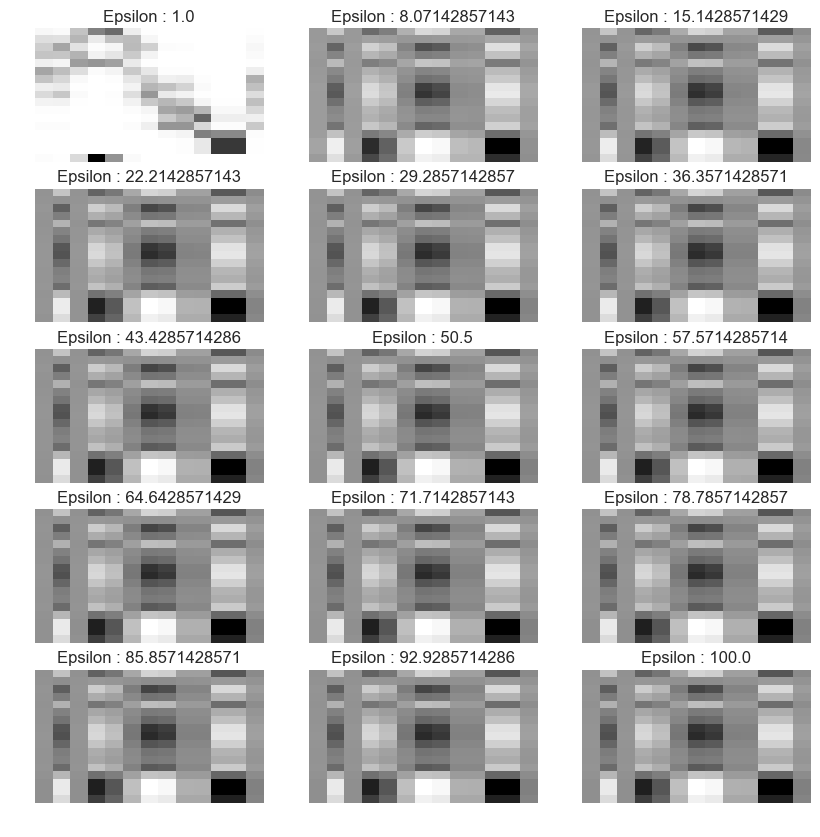

In [89]:
foo=[]
epsilons=np.linspace(1,100,15)
for eps in epsilons:
    gw=GW(epsilon=eps,method='shortest_path')
    d=gw.graph_d(graph1=X[0],graph2=X[1])
    foo.append(gw.transp)
fig, axs = plt.subplots(5, 3,figsize=(10, 10))
for i, ax in enumerate(axs.ravel()):
    ax.imshow(foo[i],interpolation='nearest', aspect='auto')
    ax.set_axis_off()
    ax.set_title('Epsilon : '+str(epsilons[i]))
plt.show()

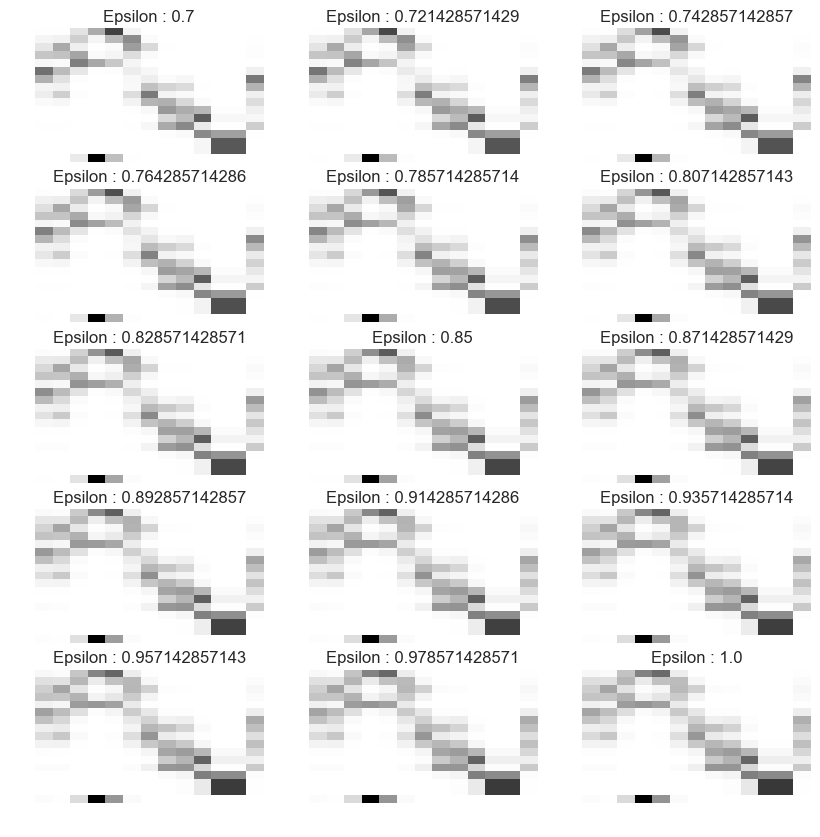

In [93]:
foo=[]
epsilons=np.linspace(0.7,1,15)
for eps in epsilons:
    gw=GW(epsilon=eps,method='shortest_path')
    d=gw.graph_d(graph1=X[0],graph2=X[1])
    foo.append(gw.transp)
fig, axs = plt.subplots(5, 3,figsize=(10, 10))
for i, ax in enumerate(axs.ravel()):
    ax.imshow(foo[i],interpolation='nearest', aspect='auto')
    ax.set_axis_off()
    ax.set_title('Epsilon : '+str(epsilons[i]))
plt.show()

## Avec EMD

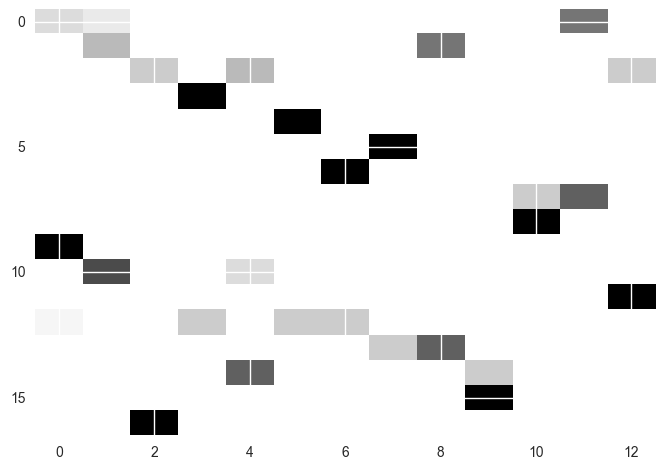

In [98]:
emd=EMD(features_metric='dirac')
d=emd.graph_d(graph1=X[0],graph2=X[1])
plt.imshow(emd.transp,interpolation='nearest',aspect='auto')
plt.show()

## Avec Gromov Wasserstein

//anaconda/lib/python3.5/site-packages/matplotlib/colors.py:943: UserWarning: Warning: converting a masked element to nan.
  vmin = float(vmin)
//anaconda/lib/python3.5/site-packages/matplotlib/colors.py:944: UserWarning: Warning: converting a masked element to nan.
  vmax = float(vmax)


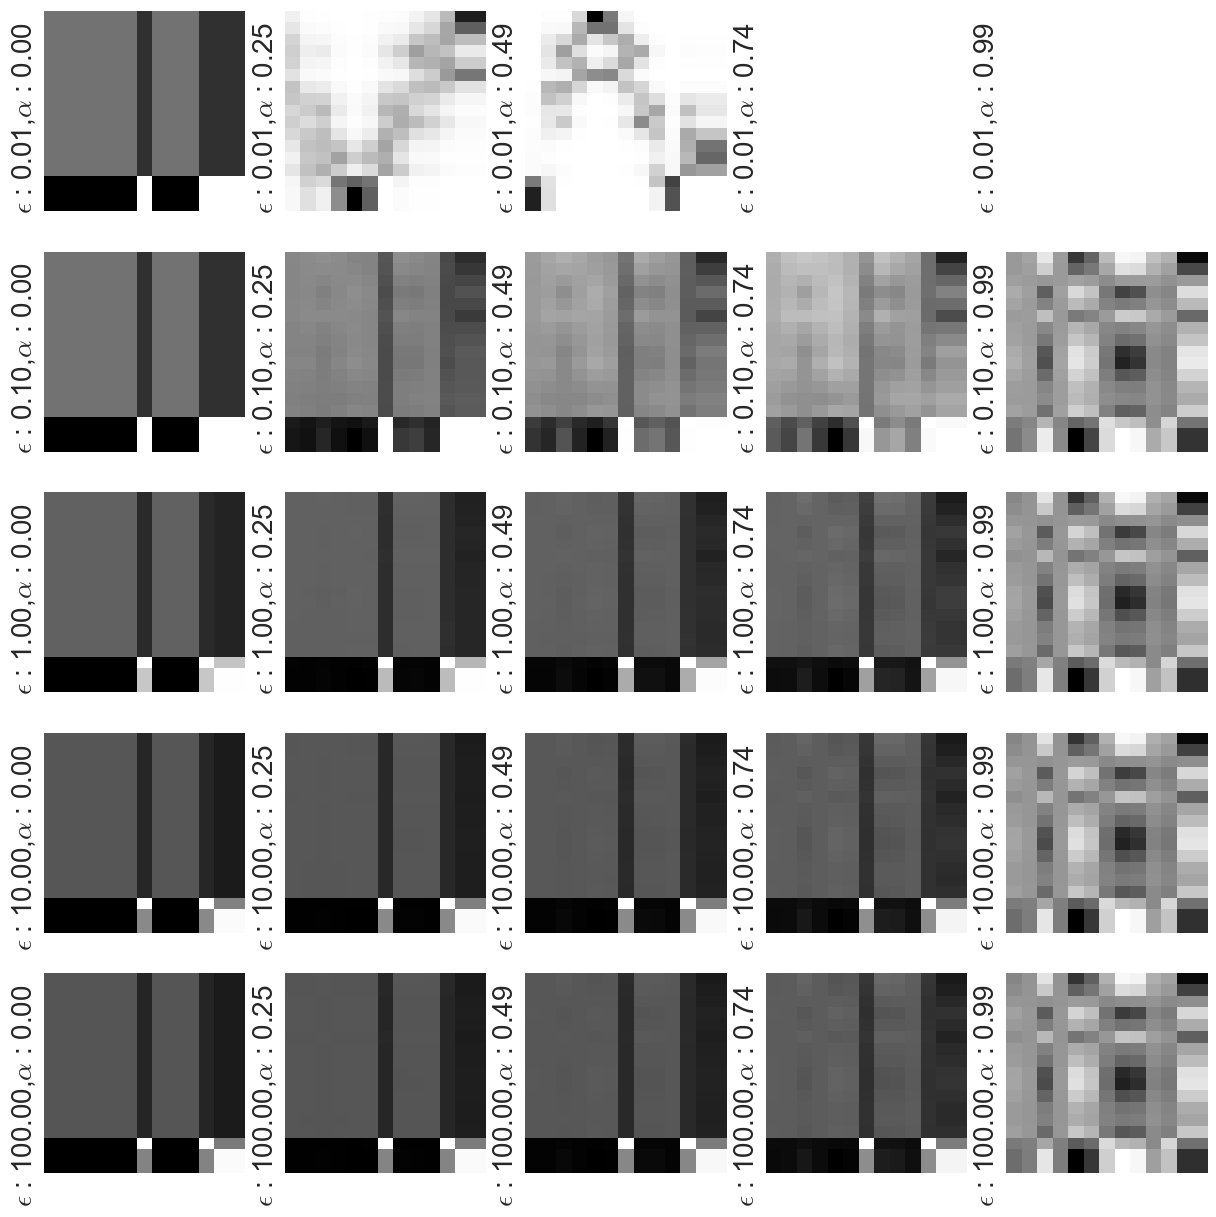

In [5]:
foo=dict()
epsilons=list(np.logspace(-2,2,5))
alphas=list(np.linspace(0,0.99,5))
i=0
j=0
for eps in epsilons:
    for alpha in alphas:
        wgw=WGW(epsilon=eps,alpha=alpha,method='shortest_path',features_metric='dirac')
        d=wgw.graph_d(graph1=X[0],graph2=X[1])
        foo[i,j]=wgw.transp
        j=j+1
    i=i+1
    j=0
fig, axs = plt.subplots(5, 5,figsize=(15, 15))
for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.imshow(foo[i,j],interpolation='nearest', aspect='auto')
        ax.set_axis_off()
        title='$\epsilon$ : '+str("%.2f" % epsilons[i])+','+'$\\alpha$ : '+str("%.2f" % alphas[j])
        ax.set_title(title,rotation='vertical',x=-0.1,y=0.8,fontsize=20)

plt.show()

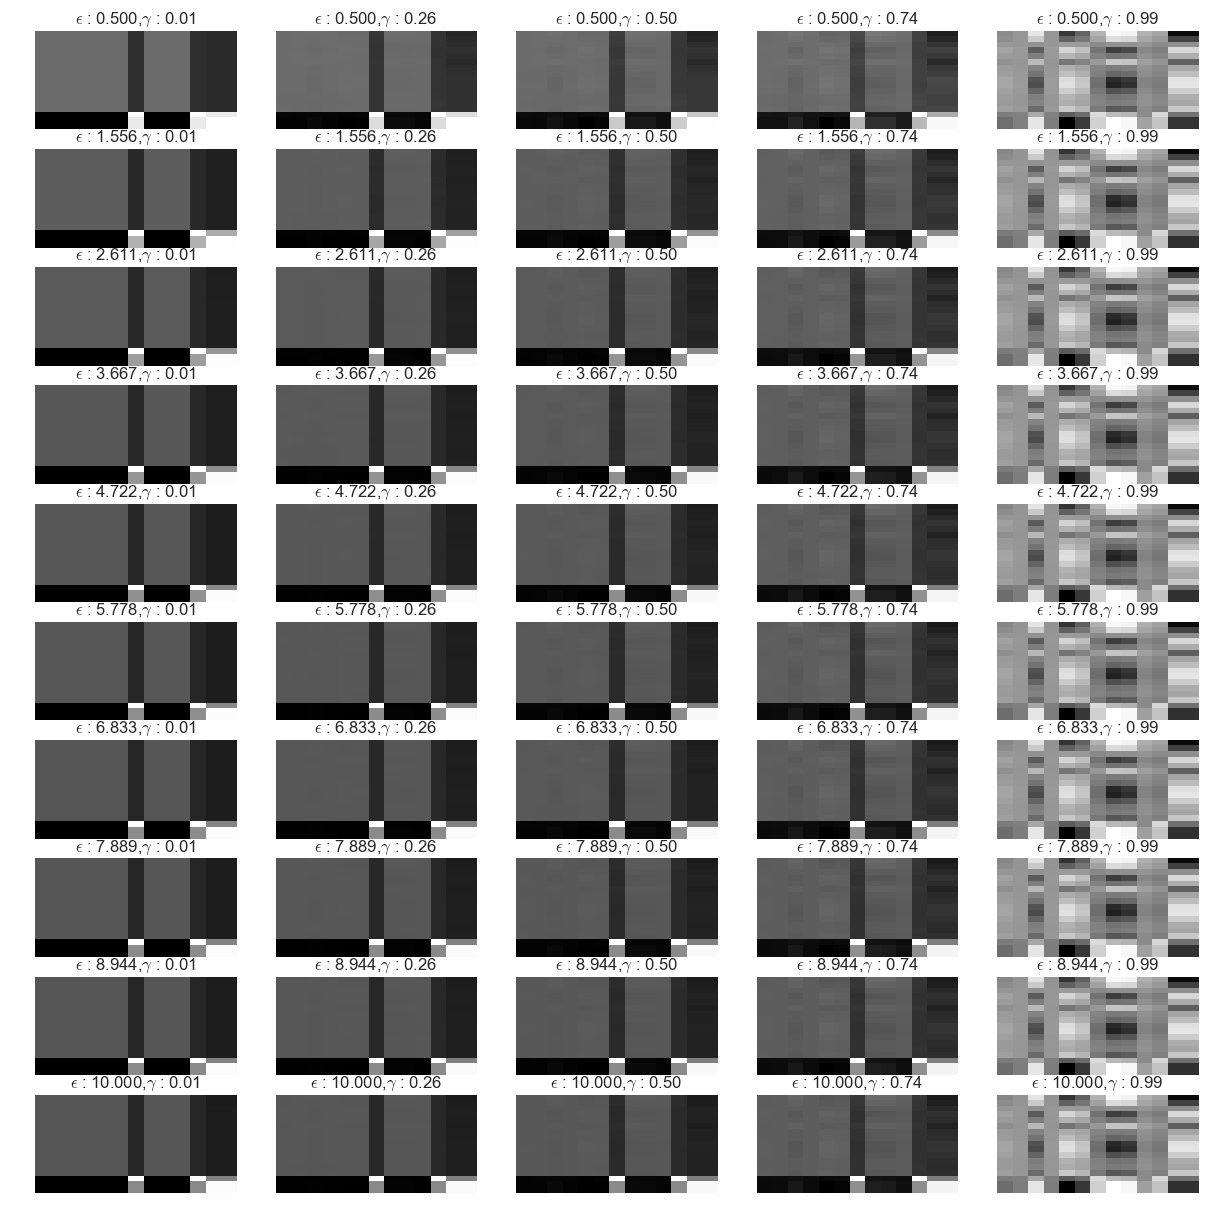

In [6]:
foo=dict()
epsilons=list(np.linspace(0.5,10,10))
alphas=list(np.linspace(0.01,0.99,5))
i=0
j=0
for eps in epsilons:
    for alpha in alphas:
        wgw=WGW(epsilon=eps,alpha=alpha,method='shortest_path',features_metric='dirac')
        d=wgw.graph_d(graph1=X[0],graph2=X[1])
        foo[i,j]=wgw.transp
        j=j+1
    i=i+1
    j=0
#fig, axs = plt.subplots(20, 5)
fig, axs = plt.subplots(10, 5,figsize=(15, 15))

for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.imshow(foo[i,j],interpolation='nearest', aspect='auto')
        ax.set_axis_off()
        title='$\epsilon$ : '+str("%.3f" % epsilons[i])+','+'$\gamma$ : '+str("%.2f" % alphas[j])
        ax.set_title(title)

plt.show()

In [20]:
list(np.logspace(-4,1,10))

[0.0001,
 0.00035938136638046257,
 0.001291549665014884,
 0.0046415888336127824,
 0.016681005372000592,
 0.059948425031894091,
 0.21544346900318845,
 0.77426368268112777,
 2.7825594022071258,
 10.0]

//anaconda/lib/python3.5/site-packages/matplotlib/colors.py:943: UserWarning: Warning: converting a masked element to nan.
  vmin = float(vmin)
//anaconda/lib/python3.5/site-packages/matplotlib/colors.py:944: UserWarning: Warning: converting a masked element to nan.
  vmax = float(vmax)


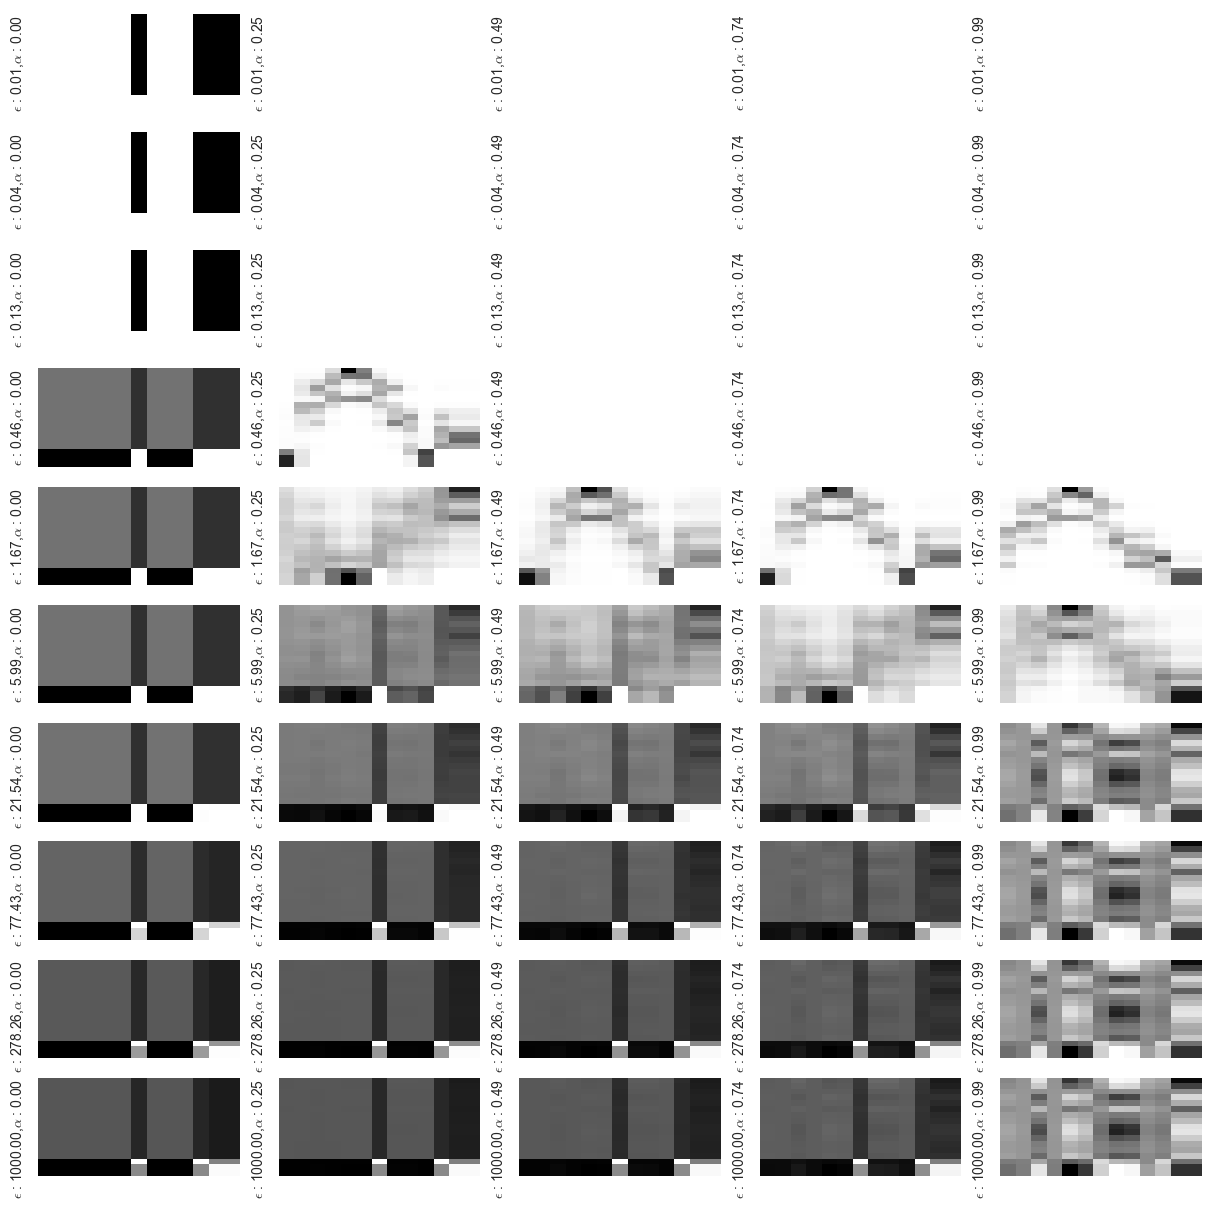

In [25]:
foo=dict()
epsilons=list(np.logspace(-4,1,10))
alphas=list(np.linspace(0,0.99,5))
i=0
j=0
for eps in epsilons:
    for alpha in alphas:
        wgw=WGW(epsilon=eps,alpha=alpha,method='shortest_path',features_metric='dirac')
        d=wgw.graph_d(graph1=X[0],graph2=X[1])
        foo[i,j]=wgw.transp
        j=j+1
    i=i+1
    j=0
fig, axs = plt.subplots(10, 5,figsize=(15, 15))
for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.imshow(foo[i,j],interpolation='nearest', aspect='auto')
        ax.set_axis_off()
        epstitle=100*epsilons[i]
        title='$\epsilon$ : '+str("%.2f" % epstitle)+','+'$\\alpha$ : '+str("%.2f" % alphas[j])
        ax.set_title(title,rotation='vertical',x=-0.1,y=0.8,fontsize=10)

plt.show()

In [28]:
y[0]

1

In [26]:
y[1]

-1

In [27]:
y[2]

-1

In [30]:
list(np.logspace(-4,1,10))

[0.0001,
 0.00035938136638046257,
 0.001291549665014884,
 0.0046415888336127824,
 0.016681005372000592,
 0.059948425031894091,
 0.21544346900318845,
 0.77426368268112777,
 2.7825594022071258,
 10.0]

//anaconda/lib/python3.5/site-packages/matplotlib/colors.py:943: UserWarning: Warning: converting a masked element to nan.
  vmin = float(vmin)
//anaconda/lib/python3.5/site-packages/matplotlib/colors.py:944: UserWarning: Warning: converting a masked element to nan.
  vmax = float(vmax)


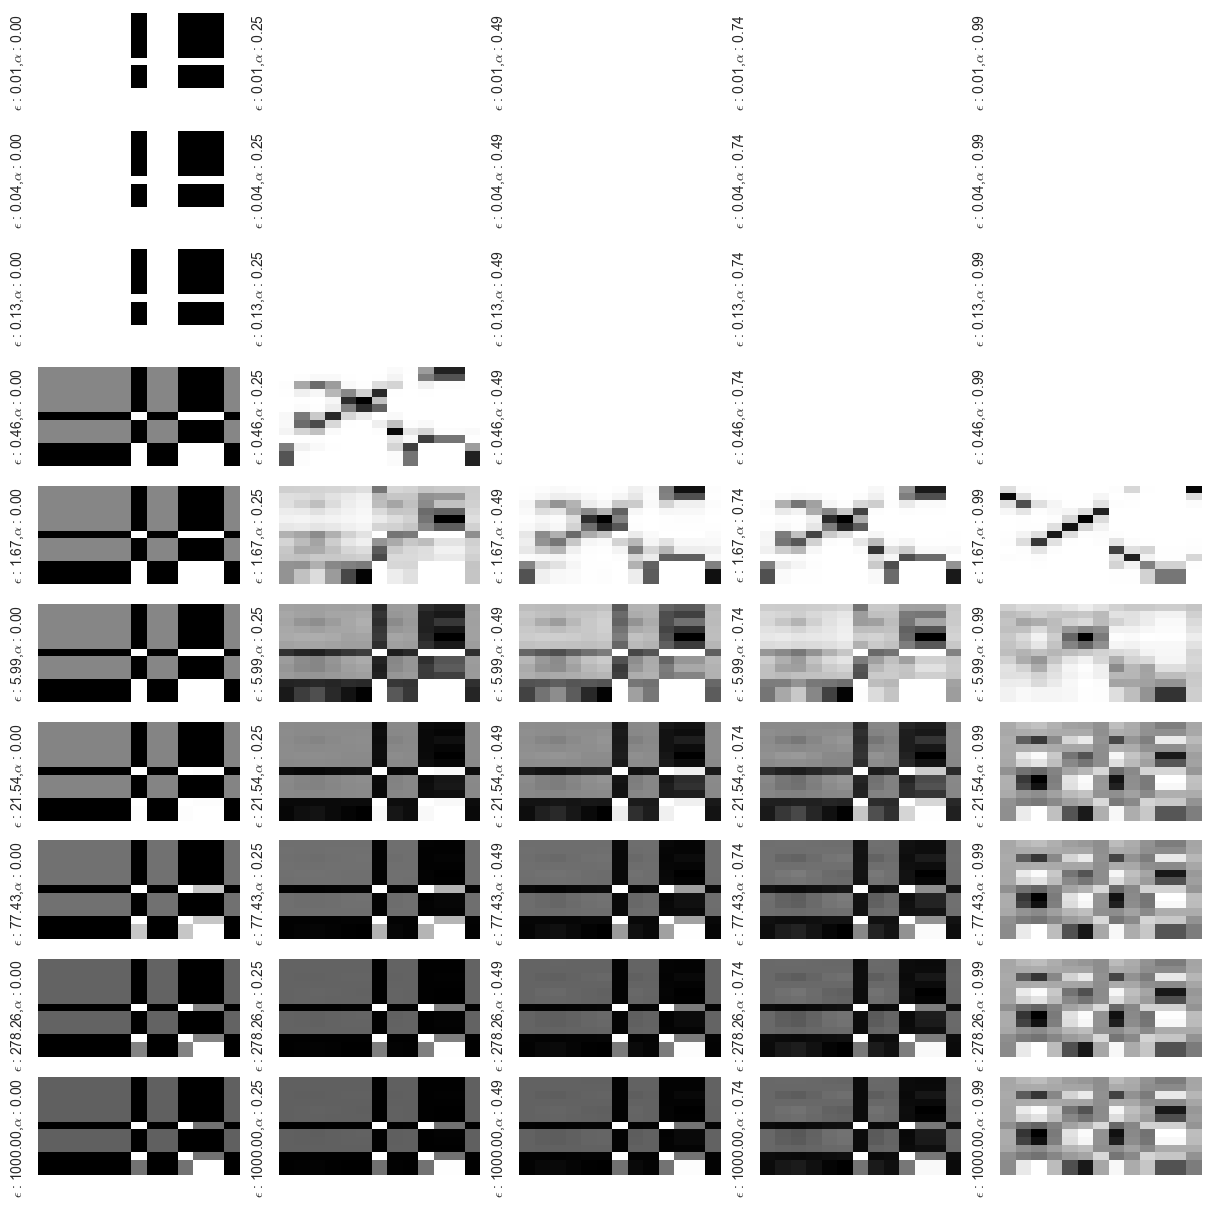

In [29]:
foo=dict()
epsilons=list(np.logspace(-4,1,10))
alphas=list(np.linspace(0,0.99,5))
i=0
j=0
for eps in epsilons:
    for alpha in alphas:
        wgw=WGW(epsilon=eps,alpha=alpha,method='shortest_path',features_metric='dirac')
        d=wgw.graph_d(graph1=X[1],graph2=X[2])
        foo[i,j]=wgw.transp
        j=j+1
    i=i+1
    j=0
fig, axs = plt.subplots(10, 5,figsize=(15, 15))
for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.imshow(foo[i,j],interpolation='nearest', aspect='auto')
        ax.set_axis_off()
        epstitle=100*epsilons[i]
        title='$\epsilon$ : '+str("%.2f" % epstitle)+','+'$\\alpha$ : '+str("%.2f" % alphas[j])
        ax.set_title(title,rotation='vertical',x=-0.1,y=0.8,fontsize=10)

plt.show()

//anaconda/lib/python3.5/site-packages/matplotlib/colors.py:943: UserWarning: Warning: converting a masked element to nan.
  vmin = float(vmin)
//anaconda/lib/python3.5/site-packages/matplotlib/colors.py:944: UserWarning: Warning: converting a masked element to nan.
  vmax = float(vmax)


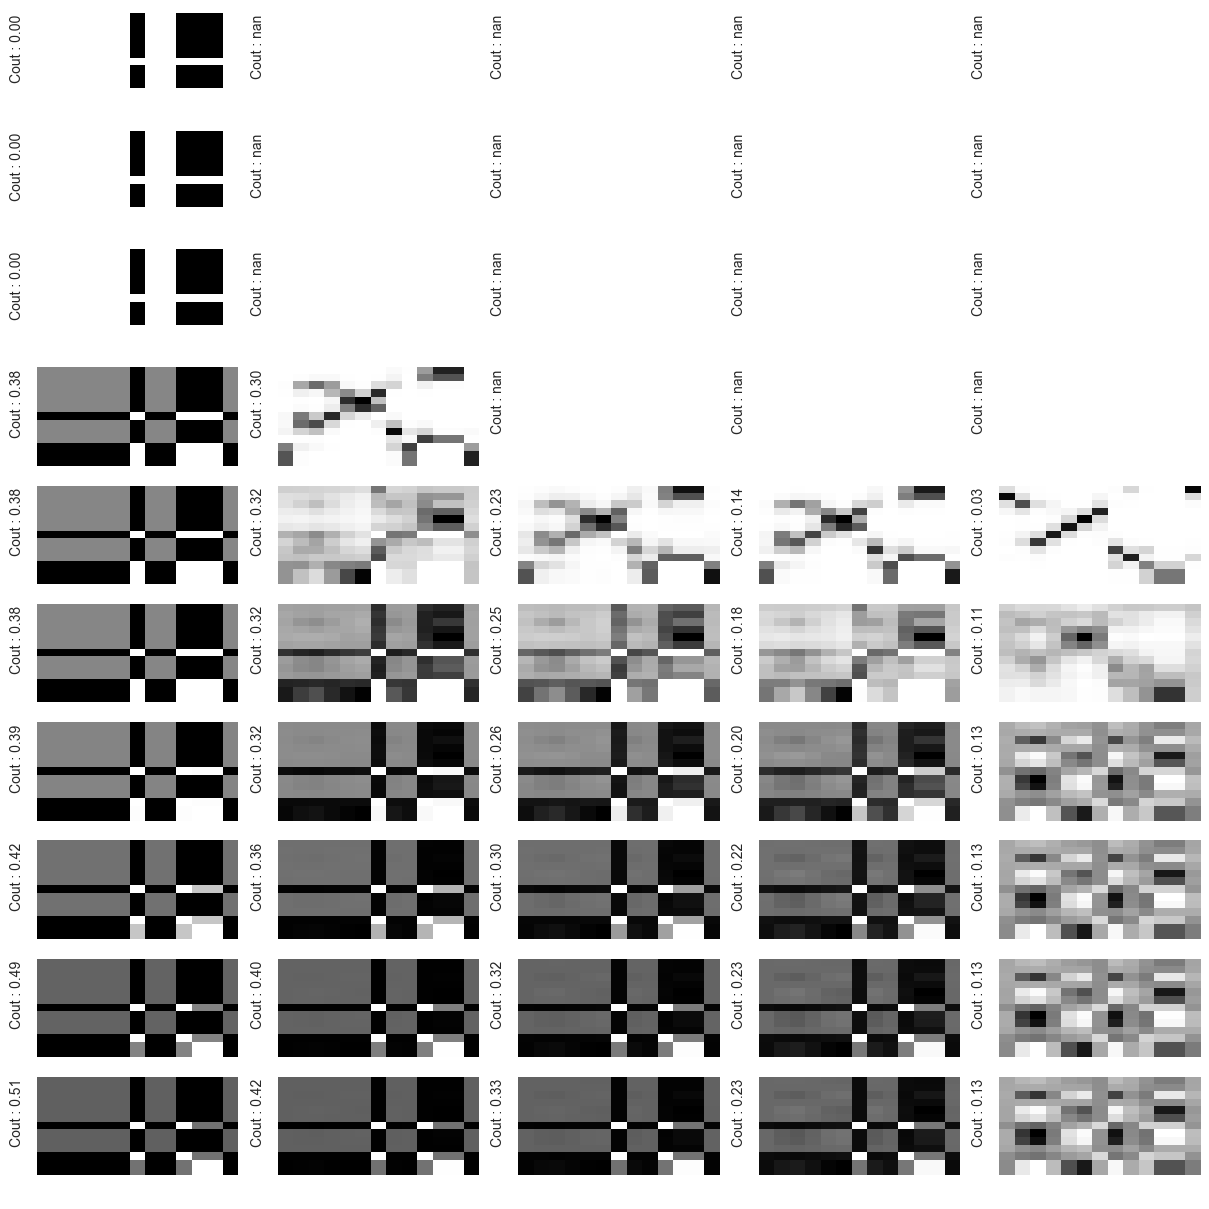

In [11]:
foo=dict()
goo=dict()
epsilons=list(np.logspace(-4,1,10))
alphas=list(np.linspace(0,0.99,5))
i=0
j=0
for eps in epsilons:
    for alpha in alphas:
        wgw=WGW(epsilon=eps,alpha=alpha,method='shortest_path',features_metric='dirac')
        d=wgw.graph_d(graph1=X[1],graph2=X[2])
        foo[i,j]=wgw.transp
        goo[i,j]=d

        j=j+1
    i=i+1
    j=0
fig, axs = plt.subplots(10, 5,figsize=(15, 15))
for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.imshow(foo[i,j],interpolation='nearest', aspect='auto')
        ax.set_axis_off()
        epstitle=100*epsilons[i]
        #title='$\epsilon$ : '+str("%.2f" % epstitle)+','+'$\\alpha$ : '+str("%.2f" % alphas[j])
        title='Cout : '+str("%.2f" % goo[i,j])
        ax.set_title(title,rotation='vertical',x=-0.1,y=0.8,fontsize=10)

plt.show()

In [14]:
y[1]

-1

//anaconda/lib/python3.5/site-packages/matplotlib/colors.py:943: UserWarning: Warning: converting a masked element to nan.
  vmin = float(vmin)
//anaconda/lib/python3.5/site-packages/matplotlib/colors.py:944: UserWarning: Warning: converting a masked element to nan.
  vmax = float(vmax)


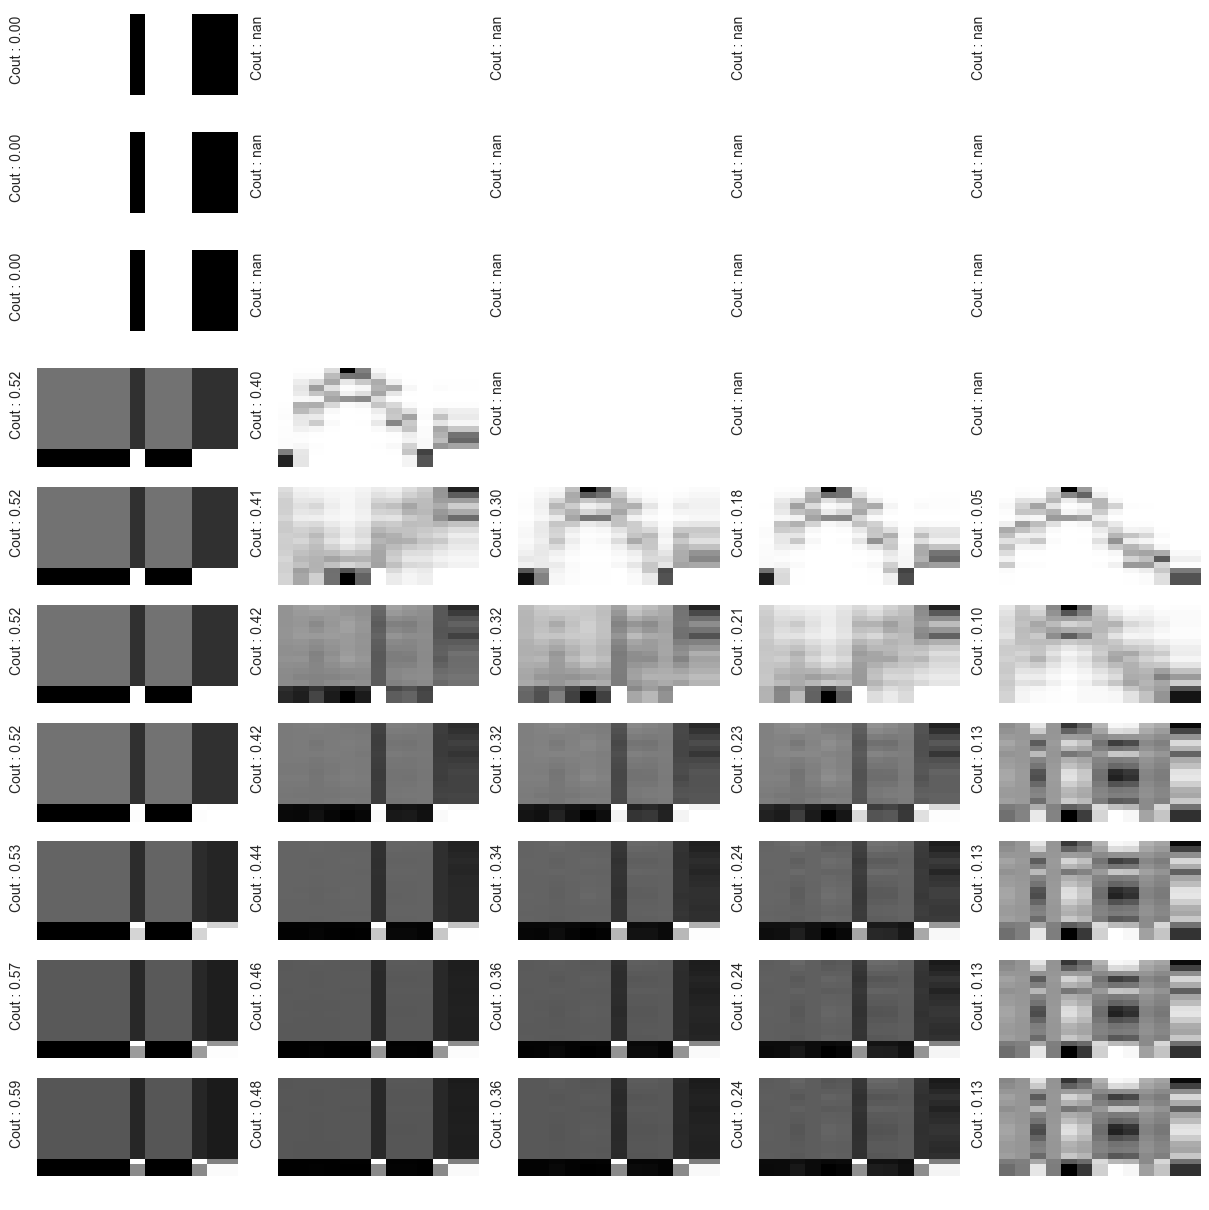

In [15]:
foo=dict()
goo=dict()
epsilons=list(np.logspace(-4,1,10))
alphas=list(np.linspace(0,0.99,5))
i=0
j=0
for eps in epsilons:
    for alpha in alphas:
        wgw=WGW(epsilon=eps,alpha=alpha,method='shortest_path',features_metric='dirac')
        d=wgw.graph_d(graph1=X[0],graph2=X[1])
        foo[i,j]=wgw.transp
        goo[i,j]=d

        j=j+1
    i=i+1
    j=0
fig, axs = plt.subplots(10, 5,figsize=(15, 15))
for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.imshow(foo[i,j],interpolation='nearest', aspect='auto')
        ax.set_axis_off()
        epstitle=100*epsilons[i]
        #title='$\epsilon$ : '+str("%.2f" % epstitle)+','+'$\\alpha$ : '+str("%.2f" % alphas[j])
        title='Cout : '+str("%.2f" % goo[i,j])
        ax.set_title(title,rotation='vertical',x=-0.1,y=0.8,fontsize=10)

plt.show()

Ca marche pas parce que c'est simplement plus une distance

//anaconda/lib/python3.5/site-packages/matplotlib/colors.py:943: UserWarning: Warning: converting a masked element to nan.
  vmin = float(vmin)
//anaconda/lib/python3.5/site-packages/matplotlib/colors.py:944: UserWarning: Warning: converting a masked element to nan.
  vmax = float(vmax)


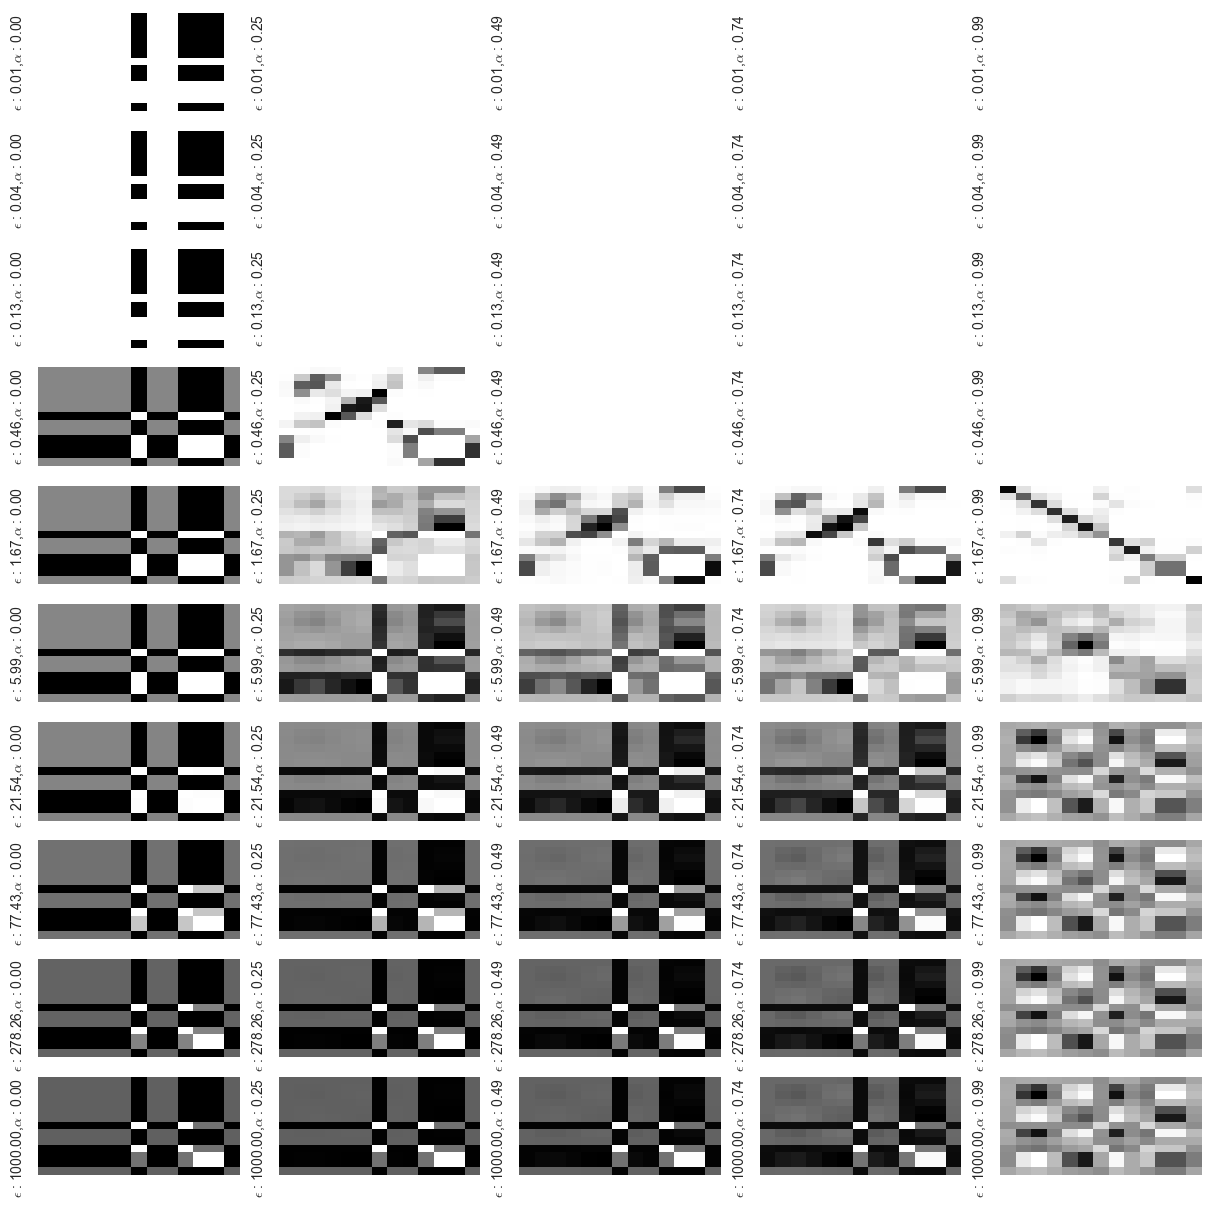

In [5]:
foo=dict()
epsilons=list(np.logspace(-4,1,10))
alphas=list(np.linspace(0,0.99,5))
i=0
j=0
for eps in epsilons:
    for alpha in alphas:
        wgw=NN.Graph_WGW_1NN_Classifier(epsilon=eps,alpha=alpha,method='shortest_path',features_metric='dirac',normalize_distance=True)
        d=wgw.compute_similarity(X[1],X[2])
        foo[i,j]=wgw.gw.transp
        j=j+1
    i=i+1
    j=0
fig, axs = plt.subplots(10, 5,figsize=(15, 15))
for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.imshow(foo[i,j],interpolation='nearest', aspect='auto')
        ax.set_axis_off()
        epstitle=100*epsilons[i]
        title='$\epsilon$ : '+str("%.2f" % epstitle)+','+'$\\alpha$ : '+str("%.2f" % alphas[j])
        ax.set_title(title,rotation='vertical',x=-0.1,y=0.8,fontsize=10)

plt.show()

//anaconda/lib/python3.5/site-packages/matplotlib/colors.py:943: UserWarning: Warning: converting a masked element to nan.
  vmin = float(vmin)
//anaconda/lib/python3.5/site-packages/matplotlib/colors.py:944: UserWarning: Warning: converting a masked element to nan.
  vmax = float(vmax)


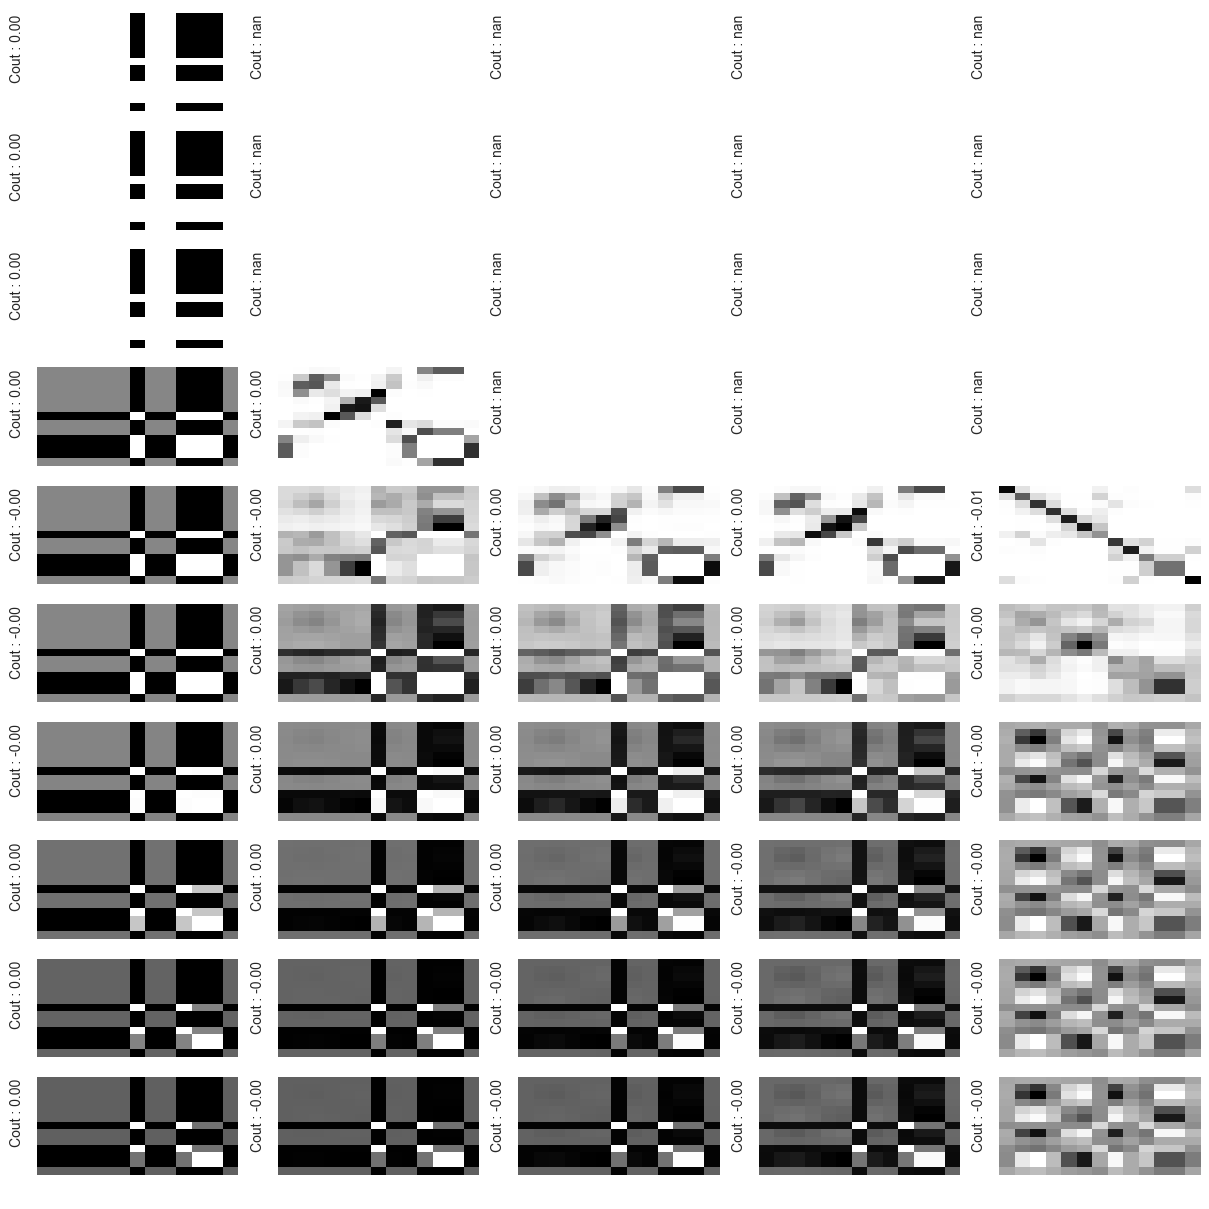

In [6]:
foo=dict()
goo=dict()
epsilons=list(np.logspace(-4,1,10))
alphas=list(np.linspace(0,0.99,5))
i=0
j=0
for eps in epsilons:
    for alpha in alphas:
        wgw=NN.Graph_WGW_1NN_Classifier(epsilon=eps,alpha=alpha,method='shortest_path',features_metric='dirac',normalize_distance=True)
        d=wgw.compute_similarity(X[1],X[2])
        foo[i,j]=wgw.gw.transp
        goo[i,j]=d
        j=j+1
    i=i+1
    j=0
fig, axs = plt.subplots(10, 5,figsize=(15, 15))
for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.imshow(foo[i,j],interpolation='nearest', aspect='auto')
        ax.set_axis_off()
        epstitle=100*epsilons[i]
        #title='$\epsilon$ : '+str("%.2f" % epstitle)+','+'$\\alpha$ : '+str("%.2f" % alphas[j])
        title='Cout : '+str("%.2f" % goo[i,j])
        ax.set_title(title,rotation='vertical',x=-0.1,y=0.8,fontsize=10)

plt.show()

In [8]:
y[0]

1

In [9]:
y[1]

-1

In [7]:
y[2]

-1

In [9]:
list(np.logspace(-3,2,25))

[0.001,
 0.0016155980984398745,
 0.0026101572156825357,
 0.0042169650342858229,
 0.0068129206905796153,
 0.011006941712522098,
 0.017782794100389229,
 0.028729848333536655,
 0.046415888336127795,
 0.074989420933245579,
 0.12115276586285889,
 0.19573417814876617,
 0.31622776601683794,
 0.51089697745069296,
 0.82540418526801895,
 1.333521432163324,
 2.1544346900318843,
 3.4807005884284132,
 5.6234132519034912,
 9.0851757565168718,
 14.677992676220706,
 23.713737056616552,
 38.311868495572931,
 61.896581889126097,
 100.0]

//anaconda/lib/python3.5/site-packages/matplotlib/colors.py:943: UserWarning: Warning: converting a masked element to nan.
  vmin = float(vmin)
//anaconda/lib/python3.5/site-packages/matplotlib/colors.py:944: UserWarning: Warning: converting a masked element to nan.
  vmax = float(vmax)


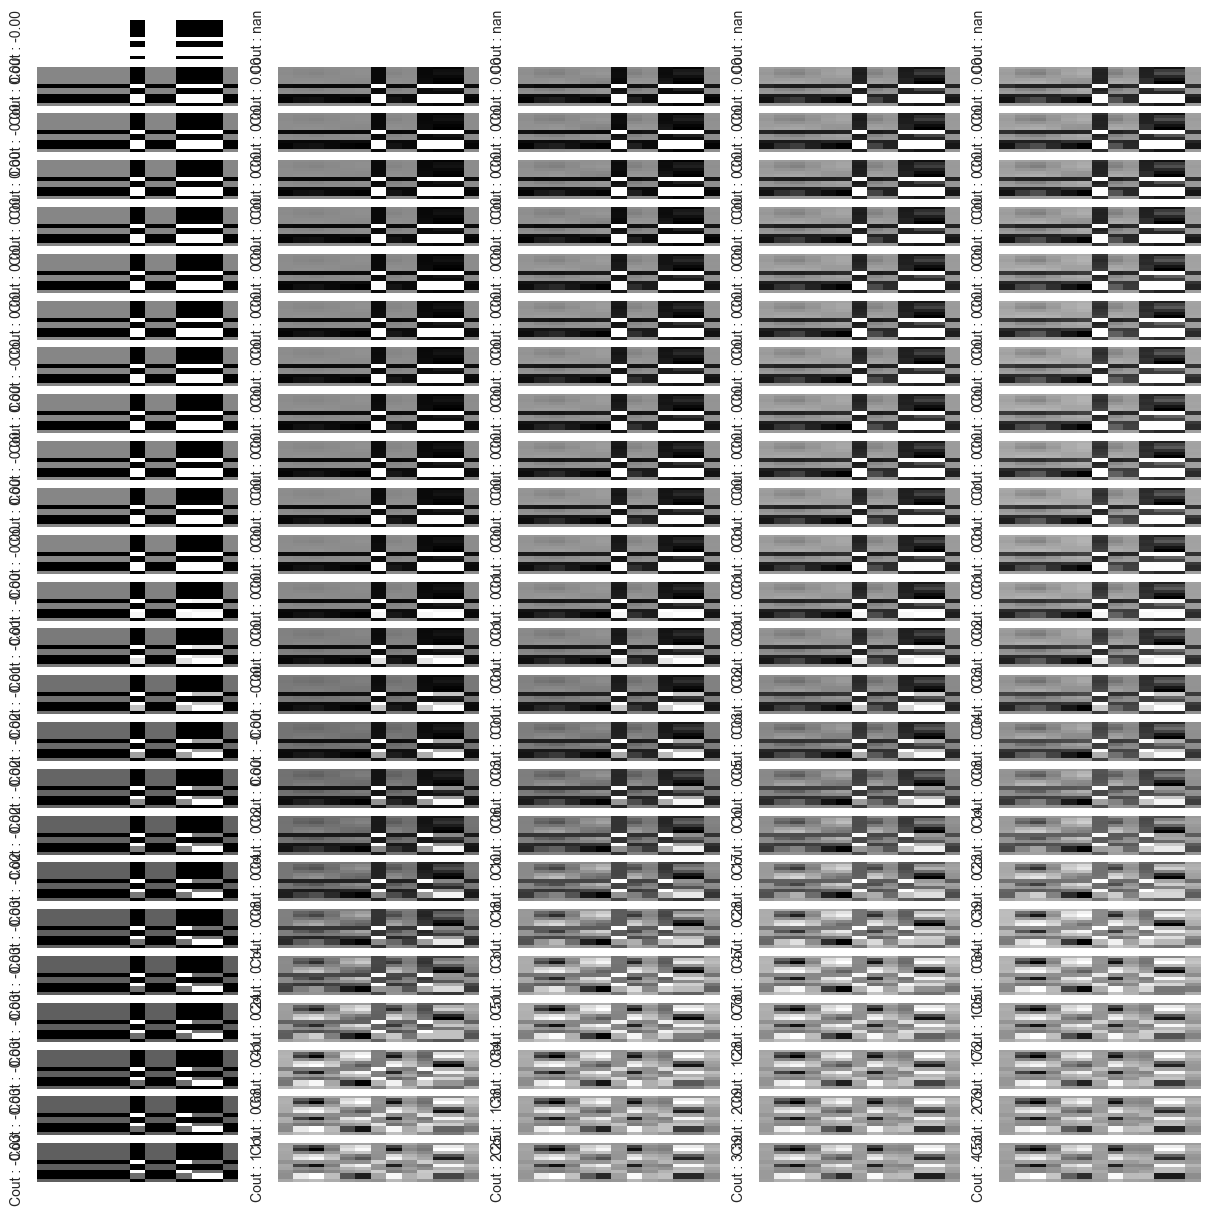

In [10]:
foo=dict()
goo=dict()
epsilons=list(np.logspace(-3,2,25))
ratios=list(np.linspace(0.0001,5,5))
i=0
j=0
for eps in epsilons:
    for ratio in ratios:
        wgw=NN.Graph_WGW_1NN_Classifier(epsilon=eps,ratio=ratio,method='shortest_path',features_metric='dirac',normalize_distance=True)
        d=wgw.compute_similarity(X[0],X[2])
        foo[i,j]=wgw.gw.transp
        goo[i,j]=d
        j=j+1
    i=i+1
    j=0
fig, axs = plt.subplots(25, 5,figsize=(15, 15))
for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.imshow(foo[i,j],interpolation='nearest', aspect='auto')
        ax.set_axis_off()
        epstitle=100*epsilons[i]
        #title='$\epsilon$ : '+str("%.2f" % epstitle)+','+'$\\alpha$ : '+str("%.2f" % alphas[j])
        title='Cout : '+str("%.2f" % goo[i,j])
        ax.set_title(title,rotation='vertical',x=-0.1,y=0.8,fontsize=10)

plt.show()

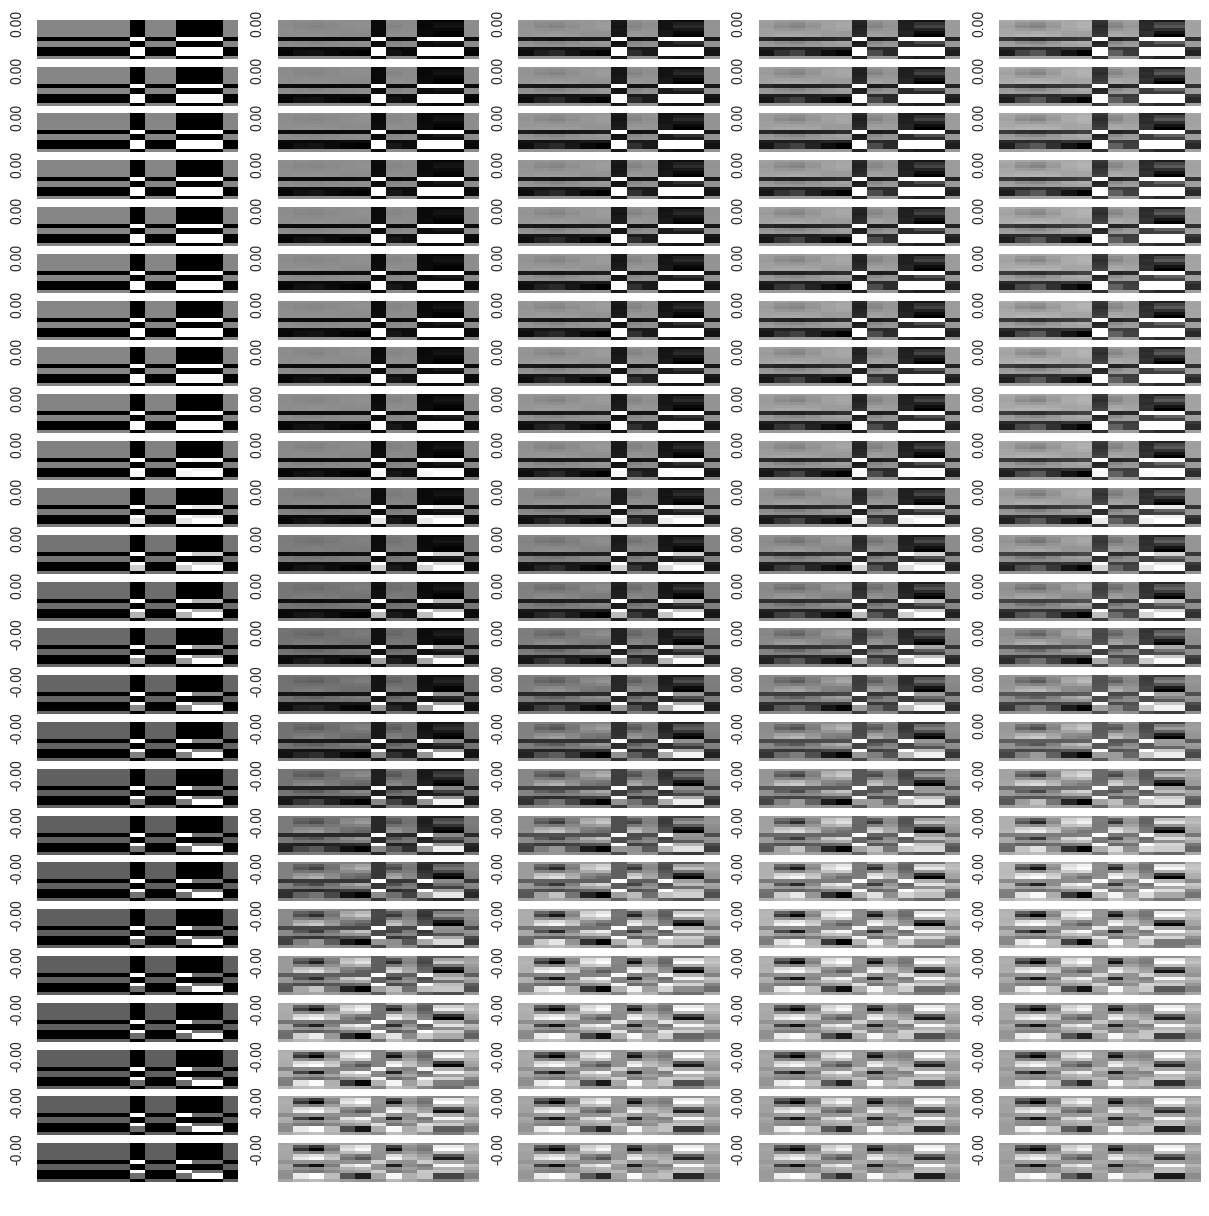

In [20]:
foo=dict()
goo=dict()
epsilons=list(np.logspace(-2,2,25))
ratios=list(np.linspace(0.0001,5,5))
i=0
j=0
for eps in epsilons:
    for ratio in ratios:
        wgw=NN.Graph_WGW_1NN_Classifier(epsilon=eps,ratio=ratio,method='shortest_path',features_metric='dirac',normalize_distance=True)
        d=wgw.compute_similarity(X[1],X[2])
        foo[i,j]=wgw.gw.transp
        goo[i,j]=d
        j=j+1
    i=i+1
    j=0
fig, axs = plt.subplots(25, 5,figsize=(15, 15))
for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.imshow(foo[i,j],interpolation='nearest', aspect='auto')
        ax.set_axis_off()
        epstitle=100*epsilons[i]
        #title='$\epsilon$ : '+str("%.2f" % epstitle)+','+'$\\alpha$ : '+str("%.2f" % alphas[j])
        title=str("%.2f" % goo[i,j])
        ax.set_title(title,rotation='vertical',x=-0.1,y=0.8,fontsize=10)

plt.show()

In [22]:
goo

{(0, 0): 7.3029138292213247e-11,
 (0, 1): 6.0320409355218985e-06,
 (0, 2): 8.3606961277515879e-06,
 (0, 3): 7.3029368982124865e-06,
 (0, 4): 3.7905472358157333e-06,
 (1, 0): 1.0718498311135249e-10,
 (1, 1): 8.853846543033228e-06,
 (1, 2): 1.2271724666557127e-05,
 (1, 3): 1.0719076673548766e-05,
 (1, 4): 1.8896430569237399e-05,
 (2, 0): 1.5738976788526315e-10,
 (2, 1): 2.1268561475440428e-05,
 (2, 2): 7.9053324539835046e-06,
 (2, 3): 2.5386028882523615e-05,
 (2, 4): 3.7477579333144995e-05,
 (3, 0): 2.3101598412011981e-10,
 (3, 1): 3.1218021125822837e-05,
 (3, 2): 1.1603445006447277e-05,
 (3, 3): 2.3328904962649499e-05,
 (3, 4): 3.1126090963617958e-05,
 (4, 0): 3.3874036908798644e-10,
 (4, 1): 5.9214070562974008e-06,
 (4, 2): 1.7024633789275434e-05,
 (4, 3): 3.423462047130732e-05,
 (4, 4): 5.8809714614915798e-05,
 (5, 0): 4.9771570198586801e-10,
 (5, 1): 1.1896614497408642e-05,
 (5, 2): 3.0314621079940984e-05,
 (5, 3): 5.0253731057159357e-05,
 (5, 4): 8.6179841897848775e-05,
 (6, 0): 7.3

In [34]:
foo=dict()
epsilons=list(np.logspace(-2,2,25))
ratios=list(np.linspace(0.001,1,5))
i=0
j=0
goo=np.zeros((len(epsilons),len(ratios)))

for eps in epsilons:
    for ratio in ratios:
        wgw=NN.Graph_WGW_1NN_Classifier(epsilon=eps,alpha=ratio,method='shortest_path',features_metric='dirac',normalize_distance=True)
        d=wgw.compute_similarity(X[1],X[2])
        foo[i,j]=wgw.gw.transp
        goo[i,j]=d
        j=j+1
    i=i+1
    j=0
fig, axs = plt.subplots(25, 5,figsize=(15, 15))
for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.imshow(foo[i,j],interpolation='nearest', aspect='auto')
        ax.set_axis_off()
        epstitle=100*epsilons[i]
        #title='$\epsilon$ : '+str("%.2f" % epstitle)+','+'$\\alpha$ : '+str("%.2f" % alphas[j])
        title=str("%.2f" % goo[i,j])
        ax.set_title(title,rotation='vertical',x=-0.1,y=0.8,fontsize=10)

#plt.show()

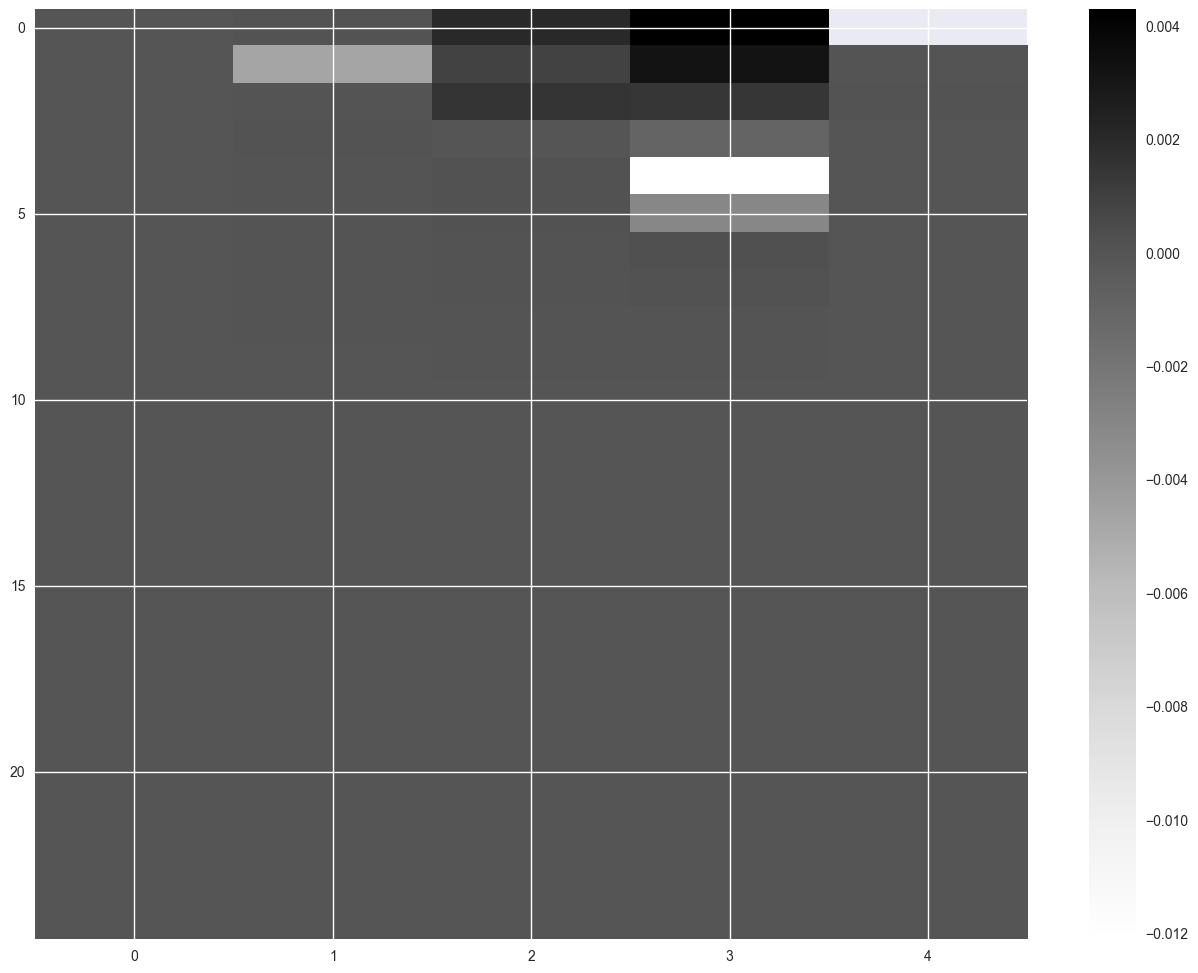

In [33]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
im=ax.imshow(goo,interpolation='nearest',aspect='auto')
fig.colorbar(im)
plt.show()

In [42]:
y[1]

-1

In [43]:
y[0]

1

In [44]:
y[2]

-1

In [60]:
y[3]

1

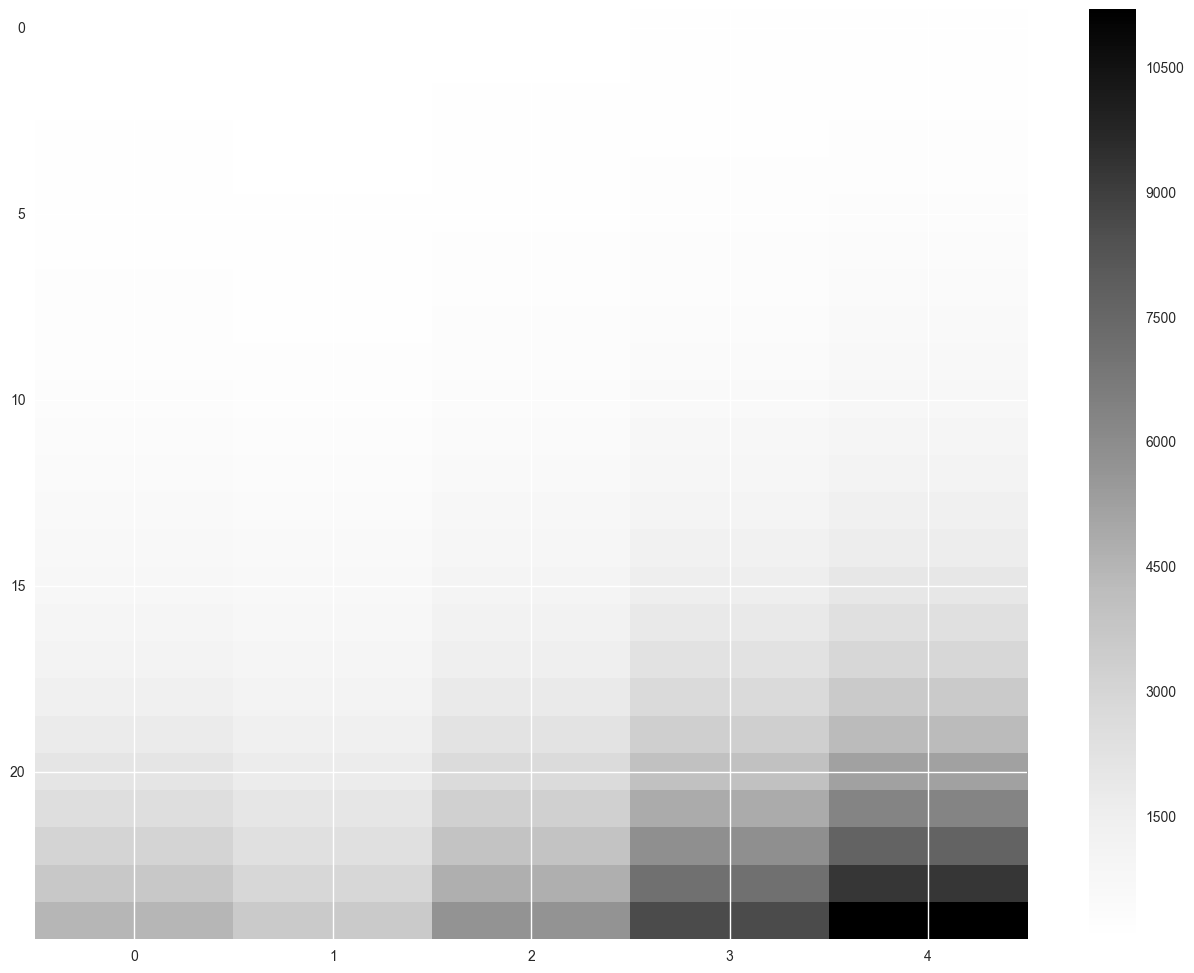

In [107]:
foo=dict()
epsilons=list(np.logspace(2,4,25))
ratios=list(np.linspace(15,10,5))
i=0
j=0
goo=np.zeros((len(epsilons),len(ratios)))

for eps in epsilons:
    for ratio in ratios:
        wgw=NN.Graph_WGW_1NN_Classifier(epsilon=eps,ratio=ratio,method='shortest_path',features_metric='dirac',normalize_distance=True)
        d=wgw.compute_similarity(X[0],X[3])
        foo[i,j]=wgw.gw.transp
        goo[i,j]=d
        j=j+1
    i=i+1
    j=0
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
im=ax.imshow(goo,interpolation='nearest',aspect='auto')
fig.colorbar(im)
plt.show()

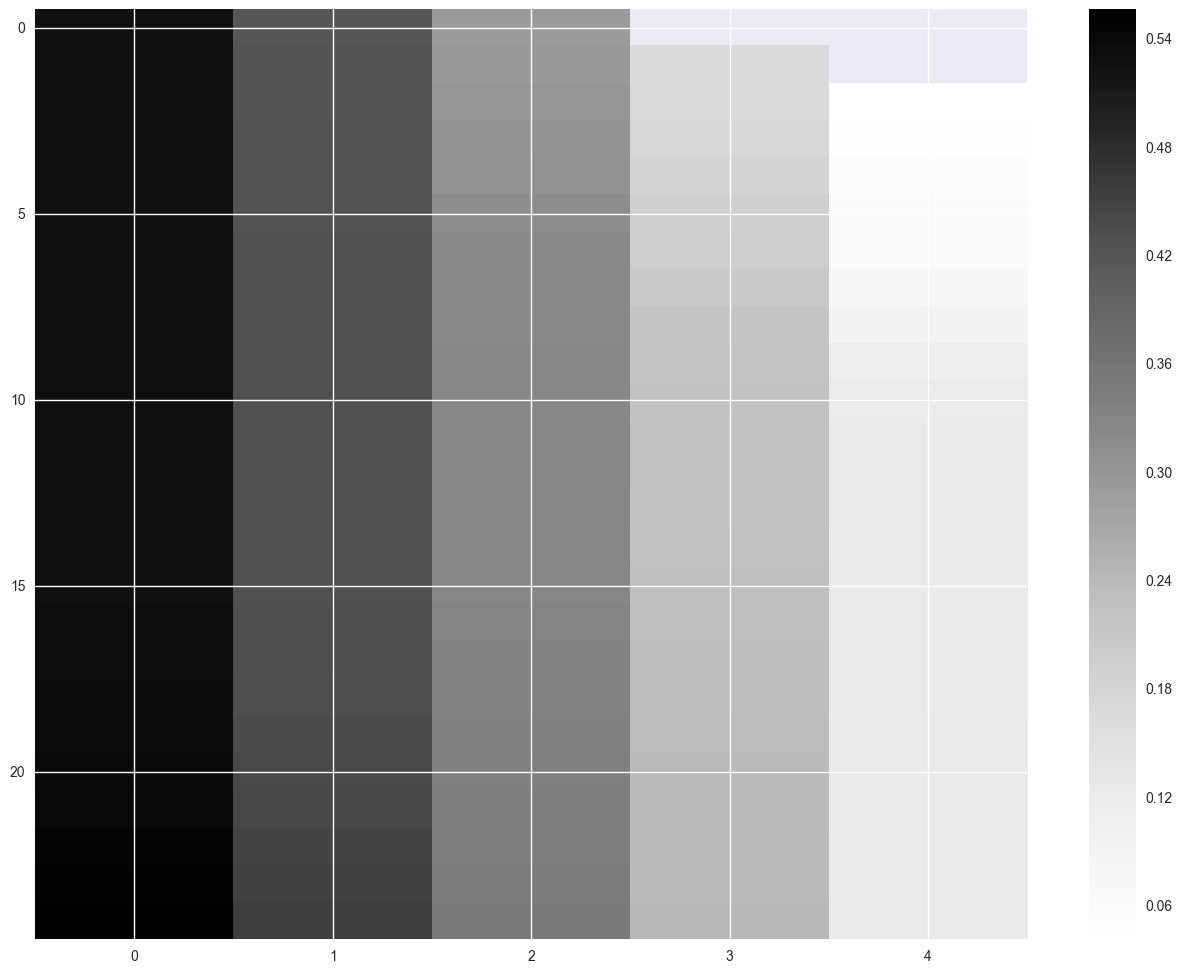

In [102]:
foo=dict()
epsilons=list(np.logspace(-2,0.05,25))
ratios=list(np.linspace(0.01,1,5))
i=0
j=0
goo=np.zeros((len(epsilons),len(ratios)))

for eps in epsilons:
    for ratio in ratios:
        wgw=NN.Graph_WGW_1NN_Classifier(epsilon=eps,alpha=ratio,method='shortest_path',features_metric='dirac',normalize_distance=False)
        d=wgw.compute_similarity(X[2],X[3])
        foo[i,j]=wgw.gw.transp
        goo[i,j]=d
        j=j+1
    i=i+1
    j=0
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
im=ax.imshow(goo,interpolation='nearest',aspect='auto')
fig.colorbar(im)
plt.show()

In [81]:
ratios


[0.01, 0.25750000000000001, 0.505, 0.75249999999999995, 1.0]

In [89]:
list(np.logspace(-2,0.05,25))

[0.01,
 0.012173533821205677,
 0.014819492569603849,
 0.018040559400917866,
 0.021961736002054356,
 0.026735193599339905,
 0.032546178349804583,
 0.039620200289233784,
 0.048231784822393042,
 0.058715126379251636,
 0.071477057679418532,
 0.087012837910067045,
 0.10592537251772886,
 0.12894861048683826,
 0.15697602709590017,
 0.19109529749704396,
 0.23263050671536251,
 0.28319353413436799,
 0.34474660657314926,
 0.41967844748641175,
 0.5108969774506924,
 0.62194216341477582,
 0.75712339611636015,
 0.9216867269448612,
 1.1220184543019633]

In [100]:
wgw=NN.Graph_WGW_1NN_Classifier(epsilon=1.12,alpha=0.001,method='shortest_path',features_metric='dirac',normalize_distance=False)
d=wgw.compute_similarity(X[2],X[3])

In [101]:
d

0.56048157911733965

In [57]:
ratios

[5.0, 7.5, 10.0, 12.5, 15.0]

In [58]:
epsilons

[100.0,
 121.15276586285889,
 146.77992676220691,
 177.82794100389228,
 215.44346900318845,
 261.01572156825358,
 316.22776601683796,
 383.1186849557285,
 464.15888336127773,
 562.34132519034904,
 681.29206905796082,
 825.40418526801818,
 1000.0,
 1211.5276586285877,
 1467.799267622069,
 1778.2794100389228,
 2154.4346900318824,
 2610.1572156825359,
 3162.2776601683795,
 3831.1868495572853,
 4641.5888336127773,
 5623.4132519034911,
 6812.9206905796082,
 8254.0418526801823,
 10000.0]

In [121]:
foo=dict()
#epsilons=list(np.logspace(-2,0.05,25))
#ratios=list(np.linspace(0.01,1,5))
epsilons=[0.01]
ratios=[0.01]
i=0
j=0
goo=np.zeros((len(epsilons),len(ratios)))

A,B=split_train_test(dataset,0.4)
x_train,y_train=zip(*A)
x_test,y_test=zip(*B)

for eps in epsilons:
    for ratio in ratios:
        wgw=NN.Graph_WGW_1NN_Classifier(epsilon=eps,alpha=ratio,method='shortest_path',features_metric='dirac',normalize_distance=True)
        wgw.fit(np.array(x_train),np.array(y_train))
        preds=wgw.predict(np.array(x_train))
        foo[i,j]=wgw.similarities_dict
        j=j+1
    i=i+1
    j=0


Construction des matrices de structures
Les distances entre pour chaque point et eux mêmes sont calculées


In [130]:
np.array(list(foo[0,0].values()))

array([  1.12272168e-04,  -7.63089572e-02,  -3.36225030e-05, ...,
         9.01641987e-05,  -6.51178587e-05,   9.48730655e-06])

In [129]:
np.sqrt(2850)

53.385391260156553

In [118]:
len(x_train)

169

On a quand même l'impression que ça converge vers la même matrice peut importe le epsilon de départ

In [177]:
foo=dict()
epsilons=list(np.linspace(0.01,200,30))
#ratios=list(np.linspace(0.01,1.4,5))
ratios=[1.4]
i=0
j=0
for eps in epsilons:
    for ratio in ratios:
        wgw=WGW(epsilon=eps,ratio=ratio,method='shortest_path',features_metric='dirac')
        d=wgw.graph_d(graph1=X[0],graph2=X[1])
        foo[i,j]=wgw.transp
        j=j+1
    i=i+1
    j=0

//anaconda/lib/python3.5/site-packages/matplotlib/colors.py:943: UserWarning: Warning: converting a masked element to nan.
  vmin = float(vmin)
//anaconda/lib/python3.5/site-packages/matplotlib/colors.py:944: UserWarning: Warning: converting a masked element to nan.
  vmax = float(vmax)


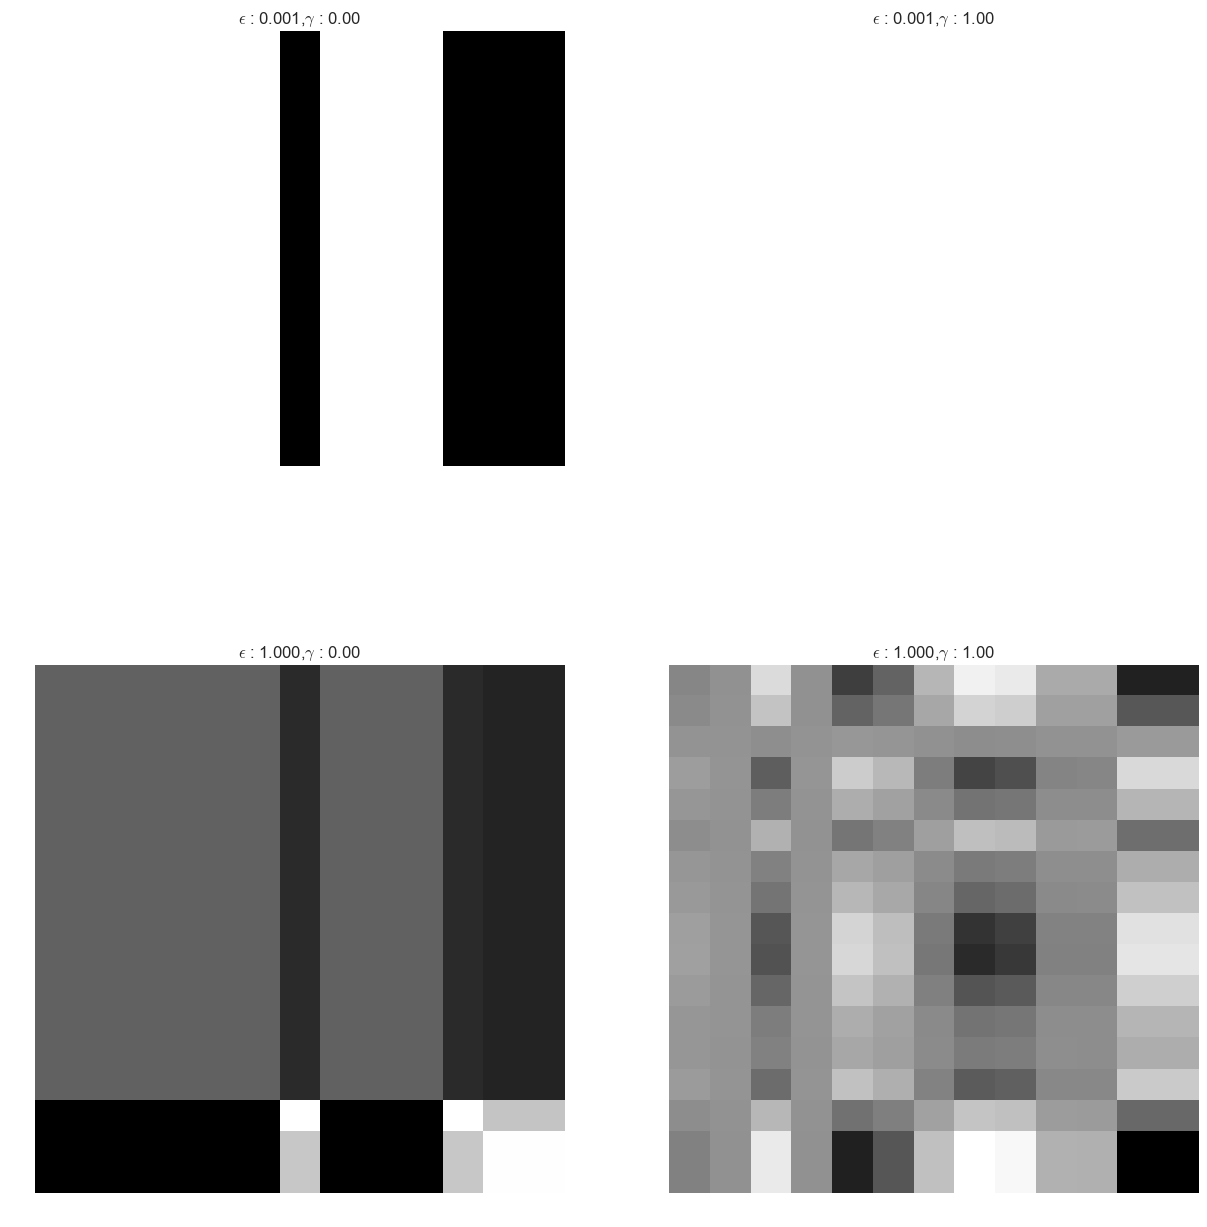

In [7]:
foo=dict()
epsilons=[0.001,1]
alphas=[0,1]
i=0
j=0
for eps in epsilons:
    for alpha in alphas:
        wgw=WGW(epsilon=eps,alpha=alpha,method='shortest_path',features_metric='dirac')
        d=wgw.graph_d(graph1=X[0],graph2=X[1])
        foo[i,j]=wgw.transp
        j=j+1
    i=i+1
    j=0
#fig, axs = plt.subplots(20, 5)
fig, axs = plt.subplots(2, 2,figsize=(15, 15))

for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.imshow(foo[i,j],interpolation='nearest', aspect='auto')
        ax.set_axis_off()
        title='$\epsilon$ : '+str("%.3f" % epsilons[i])+','+'$\gamma$ : '+str("%.2f" % alphas[j])
        ax.set_title(title)

plt.show()

### Retrouver Gromov

## Retrouver Wasserstein

In [8]:
import numpy as np
import os,sys
module_path = os.path.abspath(os.path.join('/Users/vayer/Documents/OT/Python/GW_tests/'))
if module_path not in sys.path:
    sys.path.append(module_path)
from graph import *
import copy
import NN,time
from sklearn.model_selection import StratifiedKFold
import ot_distances
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from ot_distances import Wasserstein_distance as EMD
from ot_distances import Gromov_Wasserstein_distance as WGW

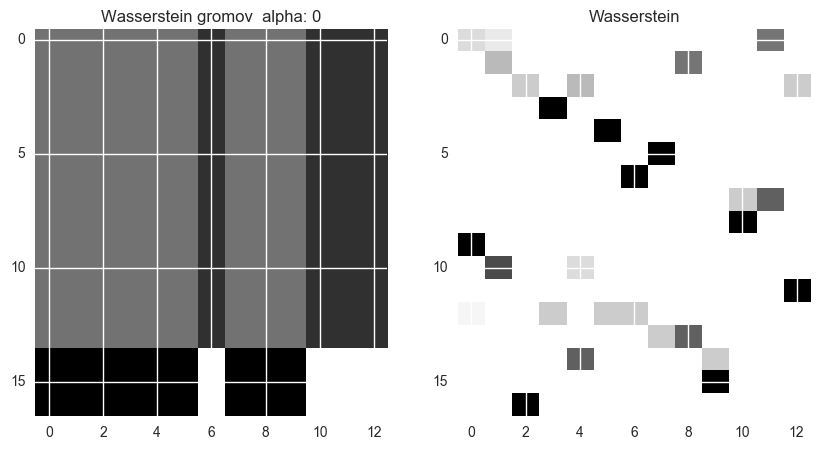

In [15]:
foo=[]
wgw=WGW(epsilon=0.01,alpha=0,method='shortest_path',features_metric='dirac')
dwgw=wgw.graph_d(graph1=X[0],graph2=X[1])
emd=EMD(features_metric='dirac')
d=emd.graph_d(graph1=X[0],graph2=X[1])
fig, axs = plt.subplots(1, 2,figsize=(10, 5))
axs[0].imshow(wgw.transp,interpolation='nearest',aspect='auto')
axs[0].set_title('Wasserstein gromov '+' alpha: '+str(wgw.alpha))
#axs[0].set_axis_off()
axs[1].imshow(emd.transp,interpolation='nearest',aspect='auto')
axs[1].set_title('Wasserstein')
#axs[1].set_axis_off()
plt.show()

In [8]:
np.sum(wgw.transp,axis=0)

array([ 0.07692308,  0.07692308,  0.07692308,  0.07692308,  0.07692308,
        0.07692308,  0.07692308,  0.07692308,  0.07692308,  0.07692308,
        0.07692308,  0.07692308,  0.07692308])

In [9]:
dwgw

0.51583710345553713

In [10]:
d

0.51583710407239813

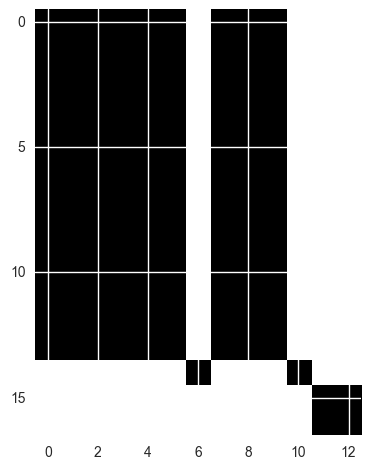

In [8]:
plt.imshow(emd.M,interpolation='nearest')
plt.show()

In [20]:
d

0.51583710407239813

In [21]:
dwgw

0.0

In [15]:
graph1=X[0]
graph2=X[1]

nodes1=graph1.nodes()
nodes2=graph2.nodes()
t1masses = np.ones(len(nodes1))/len(nodes1)
t2masses = np.ones(len(nodes2))/len(nodes2)

In [16]:
x1=graph1.all_matrix_attr().reshape(-1, 1)
x2=graph2.all_matrix_attr().reshape(-1, 1)
f=lambda x,y: x==y
M=ot.dist(x1,x2,metric=f)

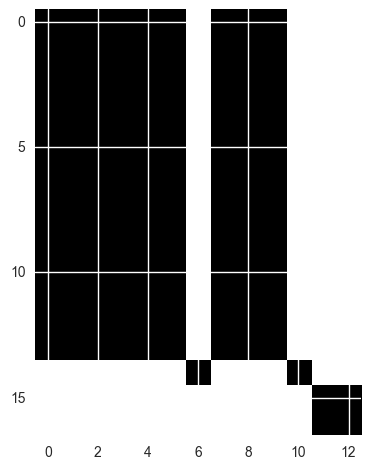

In [18]:
plt.imshow(M,interpolation='nearest')
plt.show()

In [44]:
gamma,log=ot.sinkhorn(t1masses,t2masses,M,reg=0.001,log=True,numItermax=100)

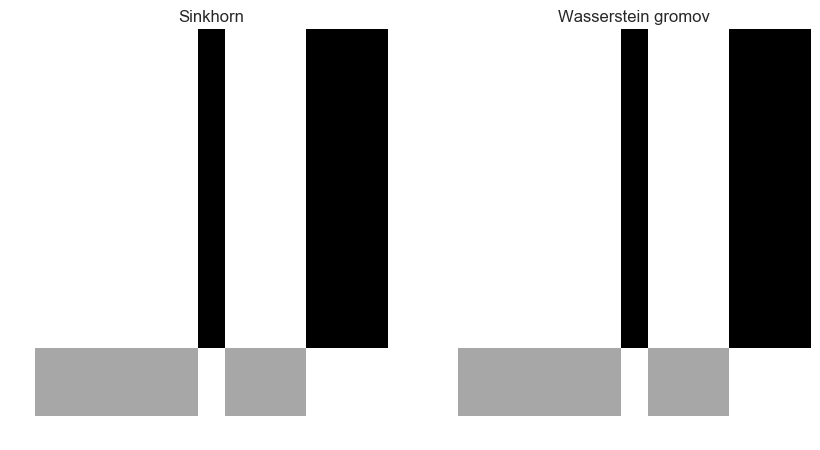

In [45]:
foo=[]
wgw=WGW(epsilon=0.001,alpha=0,method='shortest_path',features_metric='dirac')
dwgw=wgw.graph_d(graph1=X[0],graph2=X[1])
fig, axs = plt.subplots(1, 2,figsize=(10, 5))
axs[0].imshow(gamma,interpolation='nearest',aspect='auto')
axs[0].set_title('Sinkhorn')
axs[0].set_axis_off()
axs[1].imshow(wgw.transp,interpolation='nearest',aspect='auto')
axs[1].set_title('Wasserstein gromov')
axs[1].set_axis_off()
plt.show()

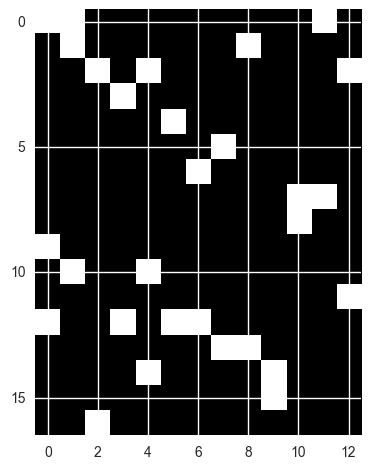

In [208]:
plt.imshow((emd.transp>0)!=(gw.transp>0),interpolation='nearest')
plt.show()

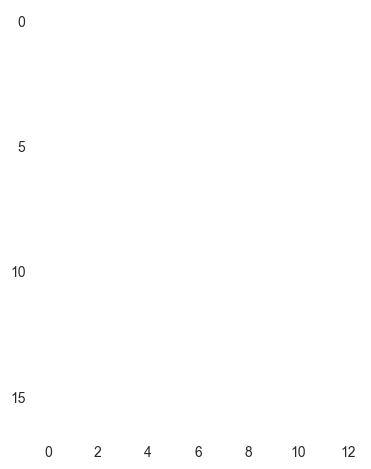

In [218]:
gw=GW(epsilon=0.7,method='shortest_path')
dgw=gw.graph_d(graph1=X[0],graph2=X[1])
wgw=WGW(epsilon=0.7,ratio=1.4,method='shortest_path',features_metric='dirac')
dwgw=wgw.graph_d(graph1=X[0],graph2=X[1])
plt.imshow((wgw.transp>0)!=(gw.transp>0),interpolation='nearest')
plt.show()